In [1]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
os.chdir('C:/Users/Austin/Downloads')

In [2]:
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')

Articles Analysis:

In [24]:
#Check for num of unique values in each column
print(articles.apply(lambda col: col.nunique()))

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64


['Dark' 'Light' 'Dusty Light' 'Medium Dusty' 'Bright' 'Medium' 'Undefined'
 'Unknown']
['Dark' 'Light' 'Dusty Light' 'Medium Dusty' 'Bright' 'Medium' 'Unknown']


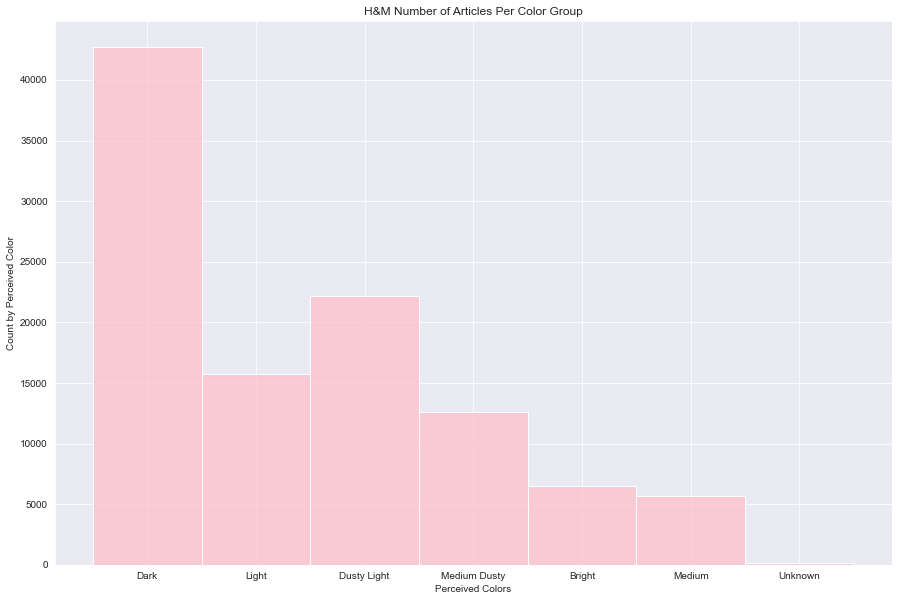

In [52]:
print(articles.perceived_colour_value_name.unique())
articles.loc[articles.perceived_colour_value_name == 'Undefined'] = 'Unknown'
print(articles.perceived_colour_value_name.unique())

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (15,10))
ax = sns.histplot(data = articles, x = 'perceived_colour_value_name', color = 'pink')
ax.set_xlabel('Perceived Colors')
ax.set_ylabel('Count by Perceived Color')
ax.set_title('H&M Number of Articles Per Color Group')
plt.show()

From above diagram, majority of H&M products are Dark, followed by Dusty Light, and Light. 

Customers Demographics Analysis

In [18]:
print(list(customers.columns))
#Check if there are any duplicates in customers
print('no duplicates' if customers.shape[0] - customers['customer_id'].nunique() == 0 else 'duplicates')

['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']
no duplicates


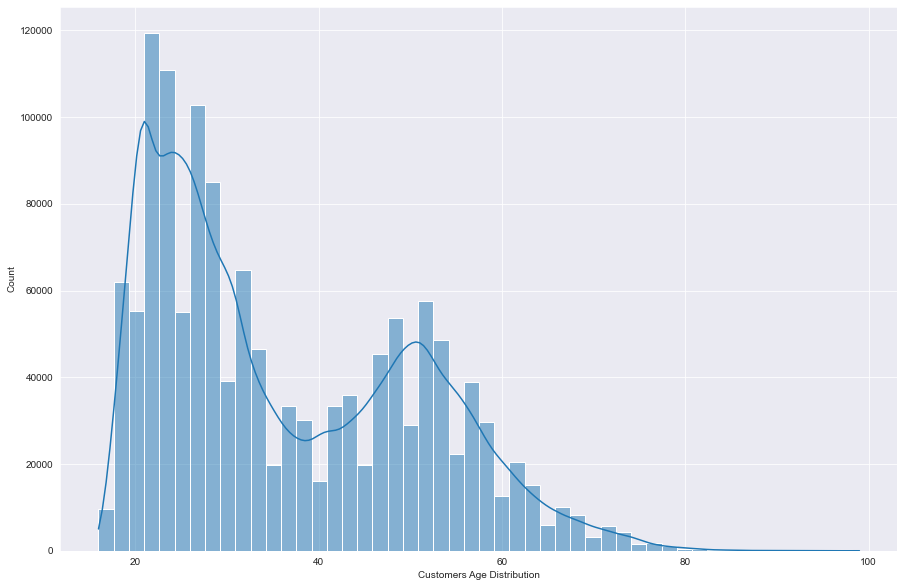

In [24]:
#Age Distribution
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize = (15,10))
ax = sns.histplot(data = customers, x = 'age', bins = 50, kde = True)
ax.set_xlabel('Customers Age Distribution')
plt.show()

Majority of H&M customers are around 20-30 years old. We also see a peak in customers who are around 50 years old. 

Text(0.5, 1.0, 'Club Member Status')

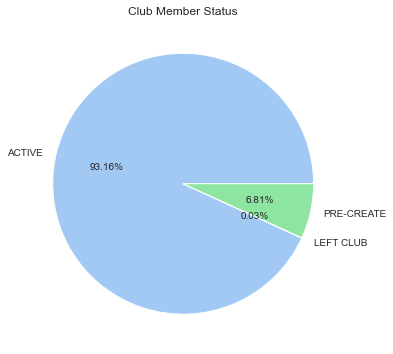

In [54]:
#Club Member Status
pastel = sns.color_palette('pastel')
pie_data = customers.groupby('club_member_status').count()
f, ax = plt.subplots(figsize = (6,6))
ax.pie(pie_data.customer_id, labels = pie_data.index,colors = pastel, autopct='%.2f%%')
ax.set_title('Club Member Status')


 Before 
                         customer_id
fashion_news_frequency             
Monthly                         842
NONE                         877711
None                              2
Regularly                    477416

 After 
                         customer_id
fashion_news_frequency             
Monthly                         842
None                         893722
Regularly                    477416


Text(0.5, 1.0, 'Fashion News Frequency')

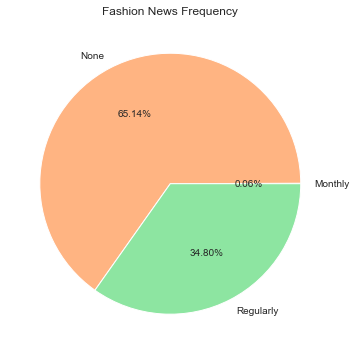

In [74]:
#Fashion News Frequency
print('\n','Before','\n',customers[['customer_id','fashion_news_frequency']].groupby
      ('fashion_news_frequency').count())
customers.loc[~customers.fashion_news_frequency.isin(['Monthly','Regularly']),'fashion_news_frequency'] = 'None'
print('\n','After','\n',customers[['customer_id','fashion_news_frequency']].groupby
      ('fashion_news_frequency').count())
pie_data = customers[['customer_id','fashion_news_frequency']].groupby('fashion_news_frequency').count()
f, ax = plt.subplots(figsize = (6,6))
ax.pie(pie_data.customer_id, labels = pie_data.index, colors = pastel, autopct = "%.2f%%")
ax.set_title("Fashion News Frequency")


Transactions Analysis:

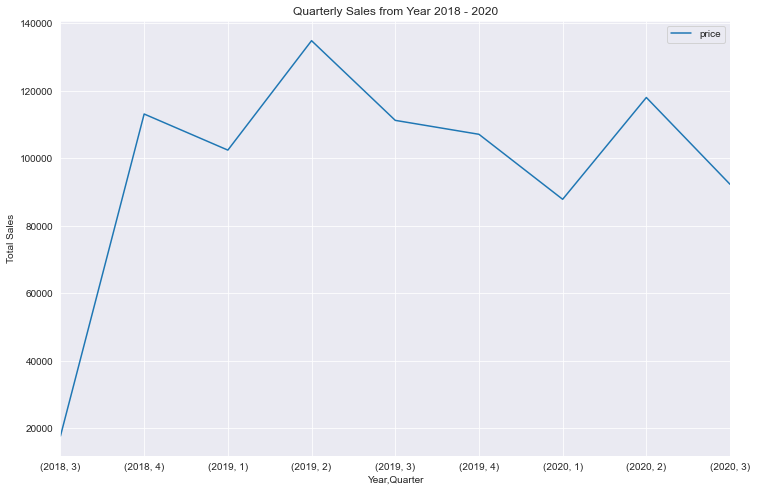

In [122]:
#Parse Dates
pd.set_option('display.float_format', '{:,.2f}'.format)
import datetime as dt
transactions.t_dat = pd.to_datetime(transactions.t_dat)
transactions['quarter'] = transactions.t_dat.dt.quarter
transactions['year'] = transactions.t_dat.dt.year
ax = transactions[['year','quarter','price']].groupby(['year','quarter']).sum().plot(kind='line', figsize = (12,8))
ax.set_xlabel('Year,Quarter')
ax.set_ylabel('Total Sales')
ax.set_title('Quarterly Sales from Year 2018 - 2020')
plt.show()

Based on this data, Q2 generates the most revenue and Q1 generates the least revenue every year.

Overall Analysis:

In [3]:
trans_art = transactions.merge(articles[['article_id','prod_name','product_group_name','index_group_name']], 
                                on = 'article_id', how = 'left')
trans_art.head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,index_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear,Ladieswear
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,Underwear,Ladieswear
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,Inca Jumper,Garment Upper body,Divided
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,W YODA KNIT OL OFFER,Garment Upper body,Ladieswear
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,W YODA KNIT OL OFFER,Garment Upper body,Ladieswear


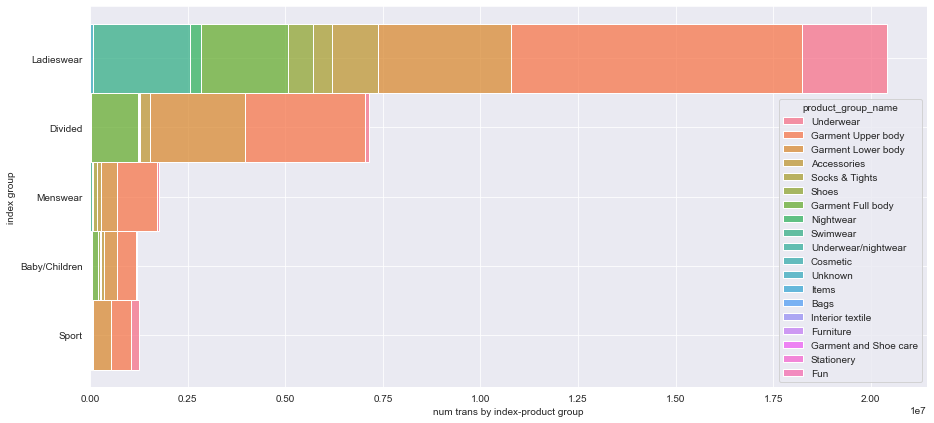

In [4]:
#num of transactions by index & product categories
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize = (15,7))
ax = sns.histplot(data = trans_art, y = 'index_group_name', hue = 'product_group_name', multiple = 'stack')
ax.set_xlabel('num trans by index-product group')
ax.set_ylabel('index group')
plt.show()

Above diagram shows that the best selling index group is ladieswear. Most of the best selling ladieswear products were upper & lower body garments. Upper & Lower garments were also mostly sold for the rest of the index groups. 

Now let's look at what kind of customers would purchase ladieswear products.

In [5]:
cust_trans_art = trans_art.merge(customers, on = 'customer_id', how = 'left')
cust_trans_art.head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,index_group_name,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear,Ladieswear,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,Underwear,Ladieswear,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,Inca Jumper,Garment Upper body,Divided,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,W YODA KNIT OL OFFER,Garment Upper body,Ladieswear,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,W YODA KNIT OL OFFER,Garment Upper body,Ladieswear,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [37]:
# Age Groups
def age_categorize(a):
    if a is None:
        return "unknown"
    elif a >= 60:
        return "above 60"
    elif a >= 50:
        return "50-59"
    elif a >= 40:
        return "40-49"
    elif a >= 30:
        return "30-39"
    elif a >= 21:
        return "21-29"
    else:
        return "below 21"
    
cust_trans_art['age_c'] = cust_trans_art['age'].map(lambda x: age_categorize(x))

Text(0.5, 61.0, 'Age Group')

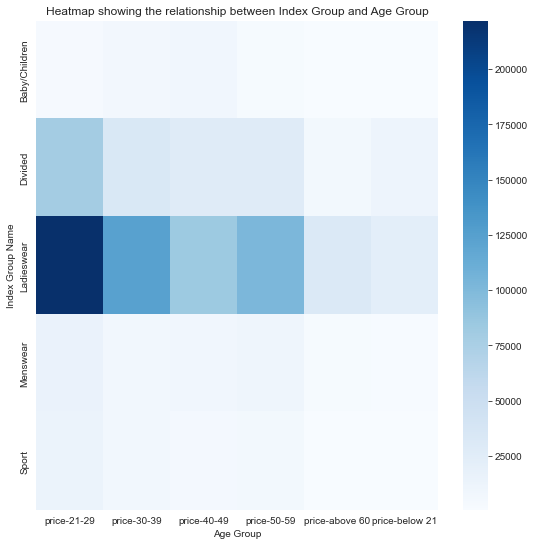

In [36]:
#Heatmap Index Group Vs Customer Age
heatmap_data = cust_trans_art[['index_group_name','age_c','price']].groupby(['index_group_name','age_c']).sum()
heatmap_data = heatmap_data.unstack().fillna(0)
f, ax = plt.subplots(figsize = (9,9))
ax = sns.heatmap(heatmap_data, cmap = "Blues")
ax.set_title("Heatmap showing the relationship between Index Group and Age Group")
ax.set_ylabel("Index Group Name")
ax.set_xlabel("Age Group")

In the above heatmap shows that Ladieswear among age group 21-29 generates the most revenue, followed by (Ladieswear x Age 30-39), (Ladieswear X Age 50-59), (Divided x Age 21-29), and (Ladieswear x Age 40-49).